# MediaPipe

In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

In [26]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [27]:
model_path = Path("..", "models", "pose_landmarker_heavy.task")
image_path = Path("..", "data", "OrangeGuy.jpg")

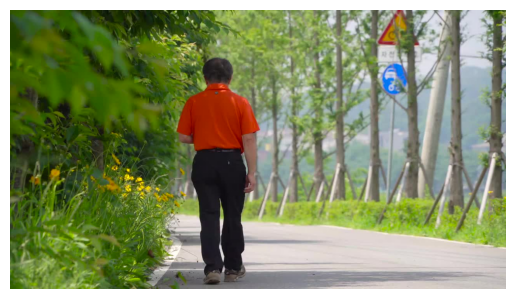

In [28]:
image = cv.imread(str(image_path))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

In [29]:
detector = vision.PoseLandmarker.create_from_options(
    mp.tasks.vision.PoseLandmarkerOptions(
        base_options = mp.tasks.BaseOptions(
            model_asset_path=model_path
        ),
        running_mode=mp.tasks.vision.RunningMode.IMAGE
    )
)

I0000 00:00:1762954701.781002   11844 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762954701.784993   14608 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.2.6), renderer: Mesa Intel(R) Iris(R) Xe Graphics (RPL-P)
W0000 00:00:1762954701.812331   14613 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762954701.885718   14618 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [30]:
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
result = detector.detect(mp_image)

In [45]:
res = []
for i in result.pose_landmarks:
    for j in i:
        res.append([j.x, j.z])

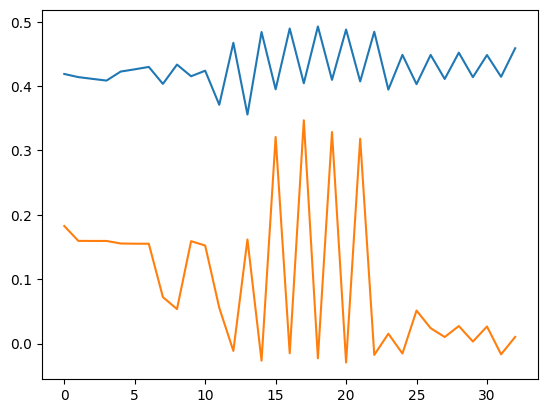

In [41]:
plt.plot(res)
plt.show()

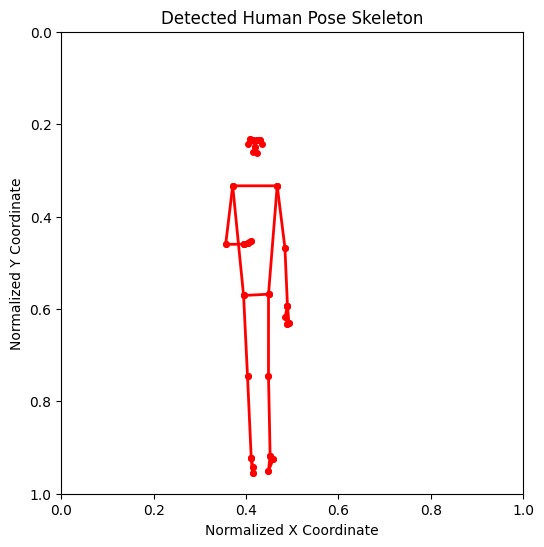

In [47]:
import mediapipe as mp
import matplotlib.pyplot as plt

# --- ASSUME 'result' OBJECT HAS BEEN POPULATED BY MEDIA PIPE DETECTOR ---
# E.g., result = detector.detect(mp_image)

# 1. Get the list of all detected pose landmarks (assuming first person)
try:
    pose_landmarks = result.pose_landmarks[0]
except IndexError:
    print("No pose landmarks found.")
    exit()

# 2. Define the connections (the 'bones' of the skeleton)
mp_pose = mp.solutions.pose
POSE_CONNECTIONS = mp_pose.POSE_CONNECTIONS

# 3. Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', adjustable='box')

# 4. Plot the connections (The Skeleton)
for connection in POSE_CONNECTIONS:
    start_idx = connection[0]
    end_idx = connection[1]

    start_point = pose_landmarks[start_idx]
    end_point = pose_landmarks[end_idx]

    # Plot the connection using x and y coordinates
    ax.plot([start_point.x, end_point.x],
            [start_point.y, end_point.y],
            color='red', linewidth=2, marker='o', markersize=4)

# 5. Set axis limits (Landmarks are normalized from 0.0 to 1.0)
ax.set_xlim(0, 1)
ax.set_ylim(1, 0) # Invert y-axis to match image/video coordinates

plt.title('Detected Human Pose Skeleton')
plt.xlabel('Normalized X Coordinate')
plt.ylabel('Normalized Y Coordinate')
plt.show()

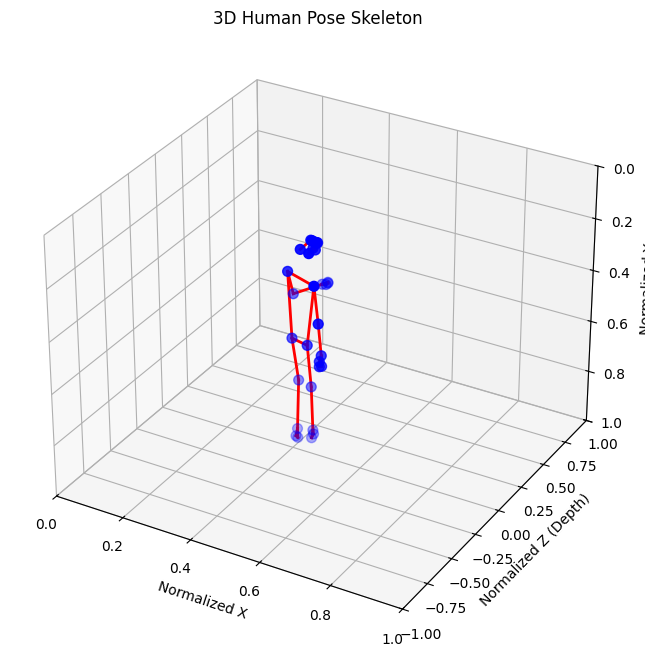

In [43]:
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import the 3D plotting toolkit

# --- ASSUME 'result' OBJECT HAS BEEN POPULATED BY MEDIA PIPE DETECTOR ---
# E.g., result = detector.detect(mp_image)

# 1. Get the list of all detected pose landmarks (assuming first person)
try:
    pose_landmarks = result.pose_landmarks[0]
except IndexError:
    print("No pose landmarks found.")
    exit()

# 2. Define the connections (the 'bones' of the skeleton)
mp_pose = mp.solutions.pose
POSE_CONNECTIONS = mp_pose.POSE_CONNECTIONS

# 3. Create a figure and a 3D subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Plot the landmarks as 3D scatter points
X = [landmark.x for landmark in pose_landmarks]
Y = [landmark.y for landmark in pose_landmarks]
Z = [landmark.z for landmark in pose_landmarks]

# Plot the joints
ax.scatter(X, Z, Y, c='blue', marker='o', s=50) # Note the Z and Y swap for better viewing (Depth is Z)

# 5. Plot the connections (The Skeleton)
for connection in POSE_CONNECTIONS:
    start_idx = connection[0]
    end_idx = connection[1]

    start_point = pose_landmarks[start_idx]
    end_point = pose_landmarks[end_idx]

    # Plot the line segment (bone)
    # We plot (X, Z, Y) to make Z the vertical axis for a standard 3D look
    ax.plot([start_point.x, end_point.x],
            [start_point.z, end_point.z],
            [start_point.y, end_point.y],
            color='red', linewidth=2)


# 6. Set labels and title
ax.set_xlabel('Normalized X')
# Z-axis is typically used for depth, but plotting it vertically often looks better
ax.set_ylabel('Normalized Z (Depth)')
ax.set_zlabel('Normalized Y')
ax.set_title('3D Human Pose Skeleton')

# Set limits for normalized coordinates (0 to 1)
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1) # Z (depth) can be negative or positive
ax.set_zlim(1, 0) # Invert Z-axis (Y-coordinate in plot) to match image perspective

plt.show()